In [1]:
import pandas as pd
import numpy as np
##visuals
import matplotlib.pyplot as plt
import seaborn as sns
## Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
## other
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [94]:
df = pd.read_csv('./Data/to_machinelearning.csv')
test = pd.read_csv('./Data/clean_test.csv')

In [4]:
ml = df.copy()

In [5]:
ml.head()

,PassengerId,Passenger_group,Passenger_No,HomePlanet,CryoSleep,Cabin,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,Age_Catg,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Name,Transported
0,0001_01,1,1,Europa,False,B/0/P,B,P,BP,TRAPPIST-1e,39.0,21-40,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,2,1,Earth,False,F/0/S,F,S,FS,TRAPPIST-1e,24.0,21-40,False,109.0,9.0,25.0,549.0,44.0,702.0,Juanna Vines,True
2,0003_01,3,1,Europa,False,A/0/S,A,S,AS,TRAPPIST-1e,58.0,41-60,True,43.0,3576.0,0.0,6715.0,49.0,6807.0,Altark Susent,False
3,0003_02,3,2,Europa,False,A/0/S,A,S,AS,TRAPPIST-1e,33.0,21-40,False,0.0,1283.0,371.0,3329.0,193.0,3522.0,Solam Susent,False
4,0004_01,4,1,Earth,False,F/1/S,F,S,FS,TRAPPIST-1e,16.0,0-20,False,303.0,70.0,151.0,565.0,2.0,870.0,Willy Santantines,True


### Lets now do the data preprocessing

In [6]:
## dropping necessary features
# ml.drop(['PassengerId','Name','Passenger_group','Passenger_No','Cabin','Age_Catg','FoodCourt','ShoppingMall'],axis=1,inplace=True)

## Dropping minimum features
ml.drop(['PassengerId','Name','Passenger_group','Passenger_No','Cabin','Age_Catg'],axis=1,inplace=True) ## has given the best accuracy

## Dropping all unneccsary features
# ml.drop(['PassengerId','Name','Passenger_group','Cabin_Deck','Cabin_Side','Destination','Age','VIP','RoomService','Spa','VRDeck','Passenger_No','Cabin','Age_Catg','FoodCourt','ShoppingMall'],axis=1,inplace=True)

In [7]:
ml['HomePlanet'] = ml['HomePlanet'].map({'Earth':1,'Europa':2,'Mars':3})

In [8]:
ml['CryoSleep'] = ml['CryoSleep'].map({False:0,True:1})

In [9]:
ml['Cabin_Deck'] = ml['Cabin_Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8})

In [10]:
ml['Cabin_Side'] = ml['Cabin_Side'].map({'P':1,'S':2})

In [11]:
dslist = ml['Cabin_DS'].unique().tolist()
dsid = np.arange(1,len(dslist)+1)
ml['Cabin_DS'].replace(dslist,dsid,True)

In [12]:
ml['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [13]:
dest_list = ml['Destination'].unique().tolist()
dest_id = np.arange(1,len(dest_list)+1)
ml['Destination'].replace(dest_list,dest_id,True)

In [14]:
ml['VIP'] = ml['VIP'].map({True:1,False:0})

In [15]:
ml['Transported'] = ml['Transported'].map({True:1,False:0})

In [16]:
ml.head()

,HomePlanet,CryoSleep,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Transported
0,2,0,2,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,6,2,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,702.0,1
2,2,0,1,2,3,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,6807.0,0
3,2,0,1,2,3,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3522.0,0
4,1,0,6,2,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,870.0,1


In [17]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier(verbose=False)
lgb = LGBMClassifier()

<AxesSubplot:>

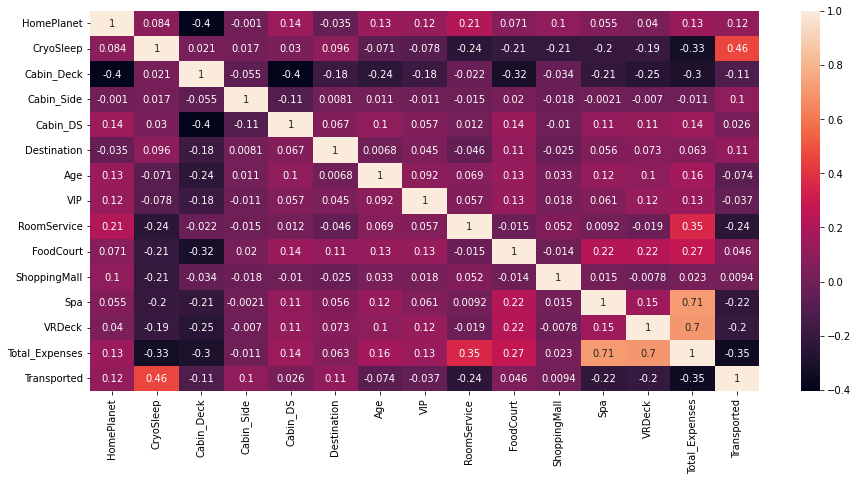

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(ml.corr(),annot=True)

### Let's check if the data is imballanced

1    4378
0    4315
Name: Transported, dtype: int64


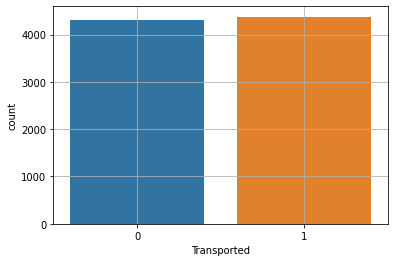

In [19]:
sns.countplot(ml.Transported)
plt.grid()
print(ml.Transported.value_counts())
plt.show()

### The data is perfectly balanced! We can use the Accuracy score as the metrics.

In [20]:
x = ml.drop('Transported',axis=1)
y = ml.Transported

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state=42)

### Logistics regression


Accuracy      : 0.77

ROC AUC Score : 0.85

Confusion Matrix :

 [[456 201]
 [105 542]]

Classification report :

               precision    recall  f1-score   support

           0       0.81      0.69      0.75       657
           1       0.73      0.84      0.78       647

    accuracy                           0.77      1304
   macro avg       0.77      0.77      0.76      1304
weighted avg       0.77      0.77      0.76      1304



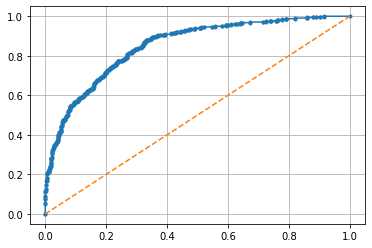

In [22]:
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_pp = lr_test_pp[:,1]
lr_acc = accuracy_score(ytest,lr_test_pred)
lr_cf = confusion_matrix(ytest,lr_test_pred)
lr_cr = classification_report(ytest,lr_test_pred)
lr_roc = roc_auc_score(ytest,lr_test_pp)
print('\nAccuracy      :',round(lr_acc,2))
print('\nROC AUC Score :',round(lr_roc,2))
print('\nConfusion Matrix :\n\n',lr_cf)
print('\nClassification report :\n\n',lr_cr)
fpr,tpr,thres = roc_curve(ytest,lr_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### KNN


Accuracy      : 0.77

ROC AUC Score : 0.84

Confusion Matrix :

 [[513 144]
 [154 493]]

Classification report :

               precision    recall  f1-score   support

           0       0.77      0.78      0.77       657
           1       0.77      0.76      0.77       647

    accuracy                           0.77      1304
   macro avg       0.77      0.77      0.77      1304
weighted avg       0.77      0.77      0.77      1304



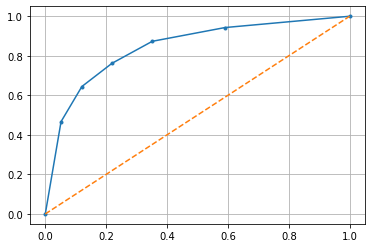

In [23]:
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_pp = kn_test_pp[:,1]
kn_acc = accuracy_score(ytest,kn_test_pred)
kn_cf = confusion_matrix(ytest,kn_test_pred)
kn_cr = classification_report(ytest,kn_test_pred)
kn_roc = roc_auc_score(ytest,kn_test_pp)
print('\nAccuracy      :',round(kn_acc,2))
print('\nROC AUC Score :',round(kn_roc,2))
print('\nConfusion Matrix :\n\n',kn_cf)
print('\nClassification report :\n\n',kn_cr)
fpr,tpr,thres = roc_curve(ytest,kn_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Decision Tree


Accuracy      : 0.75

ROC AUC Score : 0.77

Confusion Matrix :

 [[486 171]
 [152 495]]

Classification report :

               precision    recall  f1-score   support

           0       0.76      0.74      0.75       657
           1       0.74      0.77      0.75       647

    accuracy                           0.75      1304
   macro avg       0.75      0.75      0.75      1304
weighted avg       0.75      0.75      0.75      1304



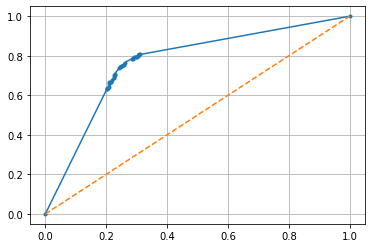

In [24]:
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_pp = dt_test_pp[:,1]
dt_acc = accuracy_score(ytest,dt_test_pred)
dt_cf = confusion_matrix(ytest,dt_test_pred)
dt_cr = classification_report(ytest,dt_test_pred)
dt_roc = roc_auc_score(ytest,dt_test_pp)
print('\nAccuracy      :',round(dt_acc,2))
print('\nROC AUC Score :',round(dt_roc,2))
print('\nConfusion Matrix :\n\n',dt_cf)
print('\nClassification report :\n\n',dt_cr)
fpr,tpr,thres = roc_curve(ytest,dt_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Random Forest


Accuracy      : 0.78

ROC AUC Score : 0.86

Confusion Matrix :

 [[516 141]
 [149 498]]

Classification report :

               precision    recall  f1-score   support

           0       0.78      0.79      0.78       657
           1       0.78      0.77      0.77       647

    accuracy                           0.78      1304
   macro avg       0.78      0.78      0.78      1304
weighted avg       0.78      0.78      0.78      1304



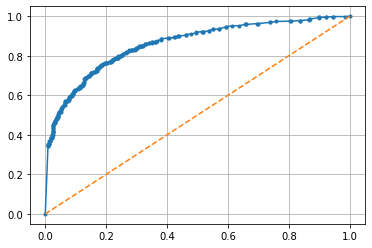

In [25]:
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_pp = rf_test_pp[:,1]
rf_acc = accuracy_score(ytest,rf_test_pred)
rf_cf = confusion_matrix(ytest,rf_test_pred)
rf_cr = classification_report(ytest,rf_test_pred)
rf_roc = roc_auc_score(ytest,rf_test_pp)
print('\nAccuracy      :',round(rf_acc,2))
print('\nROC AUC Score :',round(rf_roc,2))
print('\nConfusion Matrix :\n\n',rf_cf)
print('\nClassification report :\n\n',rf_cr)
fpr,tpr,thres = roc_curve(ytest,rf_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Gradient Boosting


Accuracy      : 0.78

ROC AUC Score : 0.88

Confusion Matrix :

 [[473 184]
 [ 97 550]]

Classification report :

               precision    recall  f1-score   support

           0       0.83      0.72      0.77       657
           1       0.75      0.85      0.80       647

    accuracy                           0.78      1304
   macro avg       0.79      0.79      0.78      1304
weighted avg       0.79      0.78      0.78      1304



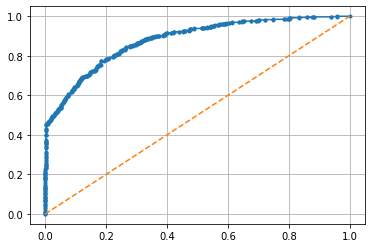

In [26]:
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_pp = gb.predict_proba(xtest)
gb_test_pp = gb_test_pp[:,1]
gb_acc = accuracy_score(ytest,gb_test_pred)
gb_cf = confusion_matrix(ytest,gb_test_pred)
gb_cr = classification_report(ytest,gb_test_pred)
gb_roc = roc_auc_score(ytest,gb_test_pp)
print('\nAccuracy      :',round(gb_acc,2))
print('\nROC AUC Score :',round(gb_roc,2))
print('\nConfusion Matrix :\n\n',gb_cf)
print('\nClassification report :\n\n',gb_cr)
fpr,tpr,thres = roc_curve(ytest,gb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### XGB

[22:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy      : 0.8

ROC AUC Score : 0.88

Confusion Matrix :

 [[516 141]
 [123 524]]

Classification report :

               precision    recall  f1-score   support

           0       0.81      0.79      0.80       657
           1       0.79      0.81      0.80       647

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



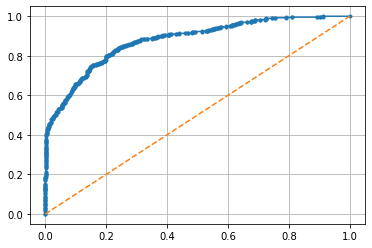

In [27]:
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_pp = xgb_test_pp[:,1]
xgb_acc = accuracy_score(ytest,xgb_test_pred)
xgb_cf = confusion_matrix(ytest,xgb_test_pred)
xgb_cr = classification_report(ytest,xgb_test_pred)
xgb_roc = roc_auc_score(ytest,xgb_test_pp)
print('\nAccuracy      :',round(xgb_acc,2))
print('\nROC AUC Score :',round(xgb_roc,2))
print('\nConfusion Matrix :\n\n',xgb_cf)
print('\nClassification report :\n\n',xgb_cr)
fpr,tpr,thres = roc_curve(ytest,xgb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### XGBRF

[22:28:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy      : 0.78

ROC AUC Score : 0.88

Confusion Matrix :

 [[464 193]
 [ 88 559]]

Classification report :

               precision    recall  f1-score   support

           0       0.84      0.71      0.77       657
           1       0.74      0.86      0.80       647

    accuracy                           0.78      1304
   macro avg       0.79      0.79      0.78      1304
weighted avg       0.79      0.78      0.78      1304



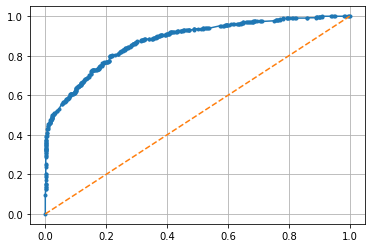

In [28]:
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_pp = xgbrf_test_pp[:,1]
xgbrf_acc = accuracy_score(ytest,xgbrf_test_pred)
xgbrf_cf = confusion_matrix(ytest,xgbrf_test_pred)
xgbrf_cr = classification_report(ytest,xgbrf_test_pred)
xgbrf_roc = roc_auc_score(ytest,xgbrf_test_pp)
print('\nAccuracy      :',round(xgbrf_acc,2))
print('\nROC AUC Score :',round(xgbrf_roc,2))
print('\nConfusion Matrix :\n\n',xgbrf_cf)
print('\nClassification report :\n\n',xgbrf_cr)
fpr,tpr,thres = roc_curve(ytest,xgbrf_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()


Accuracy      : 0.79

ROC AUC Score : 0.89

Confusion Matrix :

 [[495 162]
 [112 535]]

Classification report :

               precision    recall  f1-score   support

           0       0.82      0.75      0.78       657
           1       0.77      0.83      0.80       647

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



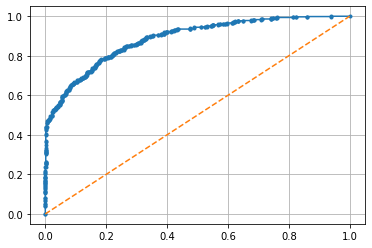

In [29]:
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_pp = cat_test_pp[:,1]
cat_acc = accuracy_score(ytest,cat_test_pred)
cat_cf = confusion_matrix(ytest,cat_test_pred)
cat_cr = classification_report(ytest,cat_test_pred)
cat_roc = roc_auc_score(ytest,cat_test_pp)
print('\nAccuracy      :',round(cat_acc,2))
print('\nROC AUC Score :',round(cat_roc,2))
print('\nConfusion Matrix :\n\n',cat_cf)
print('\nClassification report :\n\n',cat_cr)
fpr,tpr,thres = roc_curve(ytest,cat_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### LightGBM


Accuracy      : 0.8

ROC AUC Score : 0.88

Confusion Matrix :

 [[499 158]
 [109 538]]

Classification report :

               precision    recall  f1-score   support

           0       0.82      0.76      0.79       657
           1       0.77      0.83      0.80       647

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



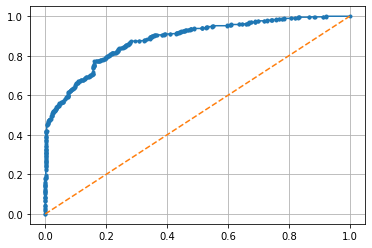

In [30]:
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_pp = lgb_test_pp[:,1]
lgb_acc = accuracy_score(ytest,lgb_test_pred)
lgb_cf = confusion_matrix(ytest,lgb_test_pred)
lgb_cr = classification_report(ytest,lgb_test_pred)
lgb_roc = roc_auc_score(ytest,lgb_test_pp)
print('\nAccuracy      :',round(lgb_acc,2))
print('\nROC AUC Score :',round(lgb_roc,2))
print('\nConfusion Matrix :\n\n',lgb_cf)
print('\nClassification report :\n\n',lgb_cr)
fpr,tpr,thres = roc_curve(ytest,lgb_test_pp)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
plt.show()

### Lets now take the ensemble of all the models that have performed well

In [31]:
lr_test_pp = lr_test_pp.tolist()
kn_test_pp = kn_test_pp.tolist()
dt_test_pp = dt_test_pp.tolist()
rf_test_pp = rf_test_pp.tolist()
gb_test_pp = gb_test_pp.tolist()
xgb_test_pp = xgb_test_pp.tolist()
xgbrf_test_pp = xgbrf_test_pp.tolist()
cat_test_pp = cat_test_pp.tolist()
lgb_test_pp = lgb_test_pp.tolist()

In [80]:
ensemble = pd.DataFrame({'lr':lr_test_pp,'rf':rf_test_pp,'gb':gb_test_pp,'xgb':xgb_test_pp,'xgbrf':xgbrf_test_pp,'cat':cat_test_pp,
                        'lgb':lgb_test_pp})

In [81]:
ensemble.head()

,lr,rf,gb,xgb,xgbrf,cat,lgb
0,0.227393,0.190000,0.163147,0.036048,0.210206,0.113037,0.192587
1,0.637957,0.760000,0.715430,0.756175,0.675706,0.782552,0.781457
2,0.588914,0.755194,0.727477,0.808598,0.704202,0.763454,0.777433
3,0.460766,0.770000,0.455822,0.464364,0.525918,0.581222,0.599857
4,0.783792,1.000000,0.925221,0.985320,0.873767,0.950326,0.986051


In [82]:
mean = []
for i in ensemble.index:
    mean.append(ensemble.iloc[i].mean())

In [83]:
ensemble['mean_proba'] = xgb_test_pp

In [84]:
ensemble.head()

,lr,rf,gb,xgb,xgbrf,cat,lgb,mean_proba
0,0.227393,0.190000,0.163147,0.036048,0.210206,0.113037,0.192587,0.036048
1,0.637957,0.760000,0.715430,0.756175,0.675706,0.782552,0.781457,0.756175
2,0.588914,0.755194,0.727477,0.808598,0.704202,0.763454,0.777433,0.808598
3,0.460766,0.770000,0.455822,0.464364,0.525918,0.581222,0.599857,0.464364
4,0.783792,1.000000,0.925221,0.985320,0.873767,0.950326,0.986051,0.985320


In [85]:
fpr,tpr,threshold = roc_curve(ytest,ensemble['mean_proba']) ## We can use a single model as well! 

0.8786249144276712


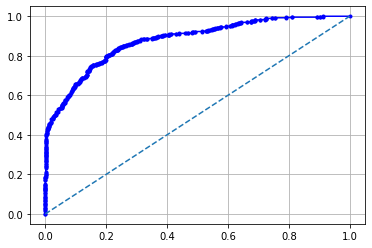

In [86]:
plt.plot(fpr,tpr,color='b',marker='.')
plt.plot([0,1],linestyle='--')
plt.grid()
print(roc_auc_score(ytest,ensemble['xgb']))
plt.show()

In [87]:
acc=[]
for i in threshold:
    ypred = np.where(ensemble.mean_proba>i,1,0)
    acc.append(accuracy_score(ytest,ypred))
    
decider = pd.concat([pd.Series(threshold),pd.Series(acc)],axis=1)
decider.rename(columns = {0: 'Threshold', 1: 'Accuracies'}, inplace = True)
decider.sort_values('Accuracies',ascending=False)

,Threshold,Accuracies
291,0.459739,0.798313
280,0.486312,0.798313
227,0.611642,0.798313
232,0.600630,0.798313
294,0.451462,0.798313
292,0.456327,0.798313
278,0.492546,0.798313
290,0.463549,0.798313
260,0.522205,0.798313
261,0.520325,0.797546


In [88]:
final_preds = []
for i in ensemble.mean_proba:
    if i > threshold[291]:
        final_preds.append(1)
    else:
        final_preds.append(0)

In [89]:
accuracy_score(ytest,final_preds)

0.7983128834355828

In [90]:
# xgb.feature_importances_

In [95]:
ml.head()

,HomePlanet,CryoSleep,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Transported
0,2,0,2,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,6,2,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,702.0,1
2,2,0,1,2,3,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,6807.0,0
3,2,0,1,2,3,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3522.0,0
4,1,0,6,2,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,870.0,1


In [96]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [97]:
ids = test['PassengerId'].tolist()

In [98]:
test.drop(['PassengerId','Name'],axis=1,inplace=True)

In [99]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [100]:
ml.head()

,HomePlanet,CryoSleep,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses,Transported
0,2,0,2,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,6,2,2,1,24.0,0,109.0,9.0,25.0,549.0,44.0,702.0,1
2,2,0,1,2,3,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,6807.0,0
3,2,0,1,2,3,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,3522.0,0
4,1,0,6,2,2,1,16.0,0,303.0,70.0,151.0,565.0,2.0,870.0,1


In [101]:
test['HomePlanet'] = test['HomePlanet'].map({'Earth':1,'Europa':2,'Mars':3})

In [102]:
test['CryoSleep'] = test['CryoSleep'].map({False:0,True:1})

In [103]:
test['Destination'].replace(dest_list,dest_id,True)

In [104]:
dk = []
sd = []
for i in test.Cabin:
    dk.append(i.split('/')[0])
    sd.append(i.split('/')[2])

In [105]:
test['Cabin_Deck'] = dk
test['Cabin_Side'] = sd

In [106]:
col = test.pop('Cabin_Deck')
test.insert(3,'Cabin_Deck',col)

In [107]:
col = test.pop('Cabin_Side')
test.insert(4,'Cabin_Side',col)

In [108]:
test.drop('Cabin',axis=1,inplace=True)

In [109]:
test['Cabin_DS'] = test['Cabin_Deck'] + test['Cabin_Side']

In [110]:
col = test.pop('Cabin_DS')
test.insert(4,'Cabin_DS',col)

In [111]:
test['Total_Expenses'] = test['RoomService'] + test['Spa'] + test['VRDeck']

In [112]:
test['Cabin_Deck'] = test['Cabin_Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8})

In [113]:
test['Cabin_Side'] = test['Cabin_Side'].map({'P':1,'S':2})

In [114]:
test.replace(dslist,dsid,True)

In [115]:
test['VIP'] = test['VIP'].map({True:1,False:0})

In [116]:
test.head()

,HomePlanet,CryoSleep,Cabin_Deck,Cabin_Side,Cabin_DS,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Expenses
0,1,1,7,2,5,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,6,2,2,1,19.0,0,0.0,9.0,0.0,2823.0,0.0,2823.0
2,2,1,3,2,9,3,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,3,2,9,1,38.0,0,0.0,6652.0,0.0,181.0,585.0,766.0
4,1,0,6,2,2,1,20.0,0,10.0,0.0,635.0,0.0,0.0,10.0


In [117]:
# ml.head()

In [118]:
lgb = xgb.fit(x,y)

[22:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [119]:
final_preds = xgb.predict(test)
final_preds_pp = xgb.predict_proba(test)
final_preds_pp = final_preds_pp[:,1]

In [120]:
threshold[291]

0.4597388207912445

In [121]:
fp = []
for i in final_preds_pp:
    if i > threshold[229]:
        fp.append(1)
    else:
        fp.append(0)

In [122]:
csv = pd.DataFrame({'PassengerId':ids , 'Transported':fp})

In [123]:
boool = []
for i in csv.Transported:
    if i  == 1:
        boool.append(True)
    else :
        boool.append(False)
csv['Transported'] = boool

In [124]:
csv.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [125]:
csv.Transported.value_counts()

False    2391
True     1886
Name: Transported, dtype: int64

In [126]:
csv.to_csv('./Predictions/XGB_final_preds_thresh0.45.csv',index=False)
# csv.to_csv('./Predictions/LGB_final_preds_thresh0.59.csv',index=False)

### NOTE : XGB model with the threshold 0.45 so far has been the best performing model